In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline     
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("train.csv")
# To display the top 5 rows 
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.tail(5)            

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [5]:
df.shape

(42000, 785)

In [6]:
table = df.groupby("label").size().reset_index(name="Frecuencia").sort_values(['Frecuencia'], ascending=False)
table

,label,Frecuencia
1,1,4684
7,7,4401
3,3,4351
9,9,4188
2,2,4177
6,6,4137
0,0,4132
4,4,4072
8,8,4063
5,5,3795


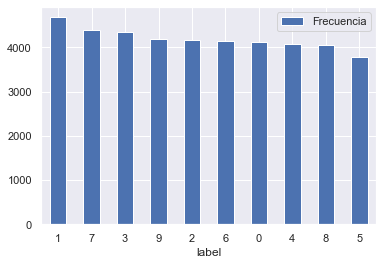

In [7]:
ax = table.plot.bar(x='label', y='Frecuencia', rot=0)

## CNN

In [8]:
x = df.to_numpy()[0:,1:].reshape(len(df),28,28,1) 
y = df.label.to_numpy()

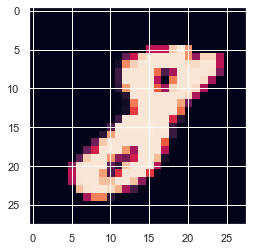

In [9]:
image = x[245]
plt.imshow(image.squeeze())

In [10]:
y[245]

8

Nomralización de datos

In [11]:
x = x/255

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

Flattening para las imágenes del 28x28 pixels a 1D 787 pixels

In [13]:
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)

In [14]:
model = keras.Sequential(
    [keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
919/919 [==============================] - 1s 822us/step - loss: 0.3557 - accuracy: 0.8985
Epoch 2/20
919/919 [==============================] - 1s 841us/step - loss: 0.1733 - accuracy: 0.9500
Epoch 3/20
919/919 [==============================] - 1s 853us/step - loss: 0.1250 - accuracy: 0.9629
Epoch 4/20
919/919 [==============================] - 1s 818us/step - loss: 0.0957 - accuracy: 0.9716
Epoch 5/20
919/919 [==============================] - 1s 808us/step - loss: 0.0742 - accuracy: 0.9778
Epoch 6/20
919/919 [==============================] - 1s 772us/step - loss: 0.0584 - accuracy: 0.9831
Epoch 7/20
919/919 [==============================] - 1s 913us/step - loss: 0.0477 - accuracy: 0.9865
Epoch 8/20
919/919 [==============================] - 1s 819us/step - loss: 0.0379 - accuracy: 0.9891
Epoch 9/20
919/919 [==============================] - 1s 778us/step - loss: 0.0306 - accuracy: 0.99140s - loss:
Epoch 10/20
919/919 [==============================] - 1s 836us/step - l

Evaluacion del modelo

In [15]:
model.evaluate(x_test,y_test)

394/394 [==============================] - 0s 578us/step - loss: 0.1470 - accuracy: 0.9702


[0.14702726900577545, 0.9701587557792664]

In [16]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=1)
y_prediction
accuracy = accuracy_score(y_train, y_prediction)
print(accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [29400, 12600]

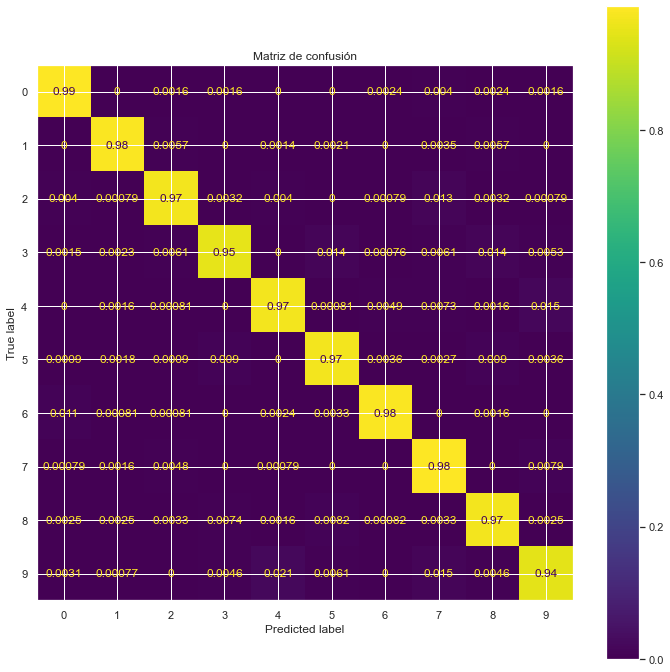

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = confusion_matrix(y_test,y_prediction, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1,2,3,4,5,6,7,8,9])
disp = disp.plot(ax=ax)
ax.set_title("Matriz de confusión")
plt.show()
%matplotlib inline

## KNN

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
x = df.drop(['label'], axis = 1)
y = df['label']
x = x/255.0
test_df = df/255.0
x = x.values
test_df = test_df.values

In [20]:
print(x.shape, y.shape)

(42000, 784) (42000,)


In [21]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 89)
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(33600, 784) (8400, 784)
(33600,) (8400,)


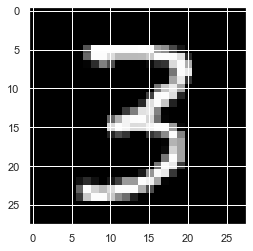

In [22]:
def drawImg(sample):
    sample = sample.reshape((28,28))
    plt.imshow(sample, cmap = 'gray')
img = x_train[10]
drawImg(img)

In [23]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [25]:
def KNN(X, y, queryPoint, k = 5):
    
    vals = []
    m = X.shape[0] 
    
    for i in range(m):
        d = dist(queryPoint, X[i]) 
        vals.append((d, y.iloc[i])) 
        
    vals = sorted(vals) 
    vals = vals[:k] 
    
    new_vals = np.unique([v[1] for v in vals], return_counts=True) 
    
    idx = new_vals[1].argmax() 
    pred = new_vals[0][idx] 
    
    return pred
    

Predcition:  1


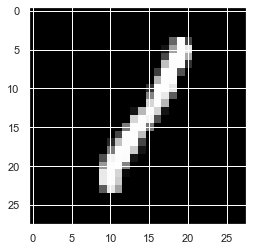

In [37]:
img = x_val[88]

pred = KNN(x_train, y_train, img, k = 3)

drawImg(img)
print("Predcition: ", pred)


1

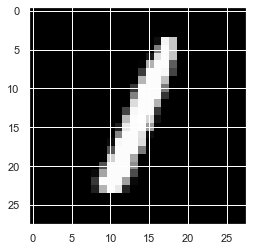

In [39]:
knn = KNeighborsClassifier()

# Fit the algorithm with the train data
knn.fit(x_train,y_train)

drawImg(x_val[90].reshape((28,28)))
knn.predict([x_val[0]])[0]

In [40]:
predictions = knn.predict(x_val)
accuracy_score(y_val, predictions)

0.9677380952380953